In [ ]:
!pip install git+https://github.com/gorodion/pycv.git

In [1]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing pycv.egg-info\PKG-INFO
writing dependency_links to pycv.egg-info\dependency_links.txt
writing requirements to pycv.egg-info\requires.txt
writing top-level names to pycv.egg-info\top_level.txt
reading manifest file 'pycv.egg-info\SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'pycv.egg-info\SOURCES.txt'
installing library code to build\bdist.win-amd64\egg
running install_lib
running build_py
copying cv3\opt.py -> build\lib\cv3
copying cv3\video.py -> build\lib\cv3
creating build\bdist.win-amd64\egg
creating build\bdist.win-amd64\egg\cv3
copying build\lib\cv3\color_spaces.py -> build\bdist.win-amd64\egg\cv3
copying build\lib\cv3\draw.py -> build\bdist.win-amd64\egg\cv3
copying build\lib\cv3\io.py -> build\bdist.win-amd64\egg\cv3
copying build\lib\cv3\opt.py -> build\bdist.win-amd64\egg\cv3
copying build\lib\cv3\options.py -> build\bdist.win-amd64\egg\cv3
copying build\lib\cv3\processing.py -> build\bdist.win-amd

zip_safe flag not set; analyzing archive contents...


In [2]:
import cv3
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')

## Input/Output

<div class="alert alert-block alert-success">
Forget the silence when image didn't read or file not exists
</div>

Read image as RGB (all the input/output operations do BGR2RGB)

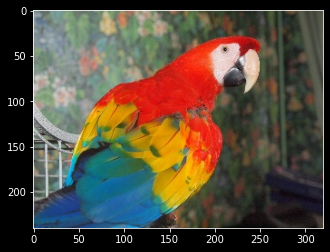

In [3]:
img = cv3.imread('img.jpeg')
plt.imshow(img)

Reading non-existent file

In [10]:
try:
    img = cv3.imread('img0.jpeg')
except FileNotFoundError as exc:
    print('FILE NOT FOUND:', exc)

FILE NOT FOUND: img0.jpeg


Reading not image

In [11]:
try:
    img = cv3.imread('README.md')
except AssertionError as exc:
    print(exc)

File was not read: README.md


It can even work with pathlib.Path type

In [12]:
impath = Path('img.jpeg')
img = cv3.imread(impath)

Reading image as gray

Image shape: (240, 320)


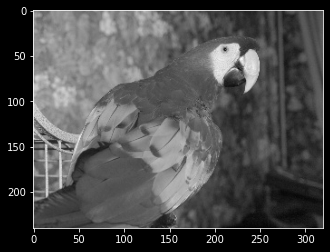

In [13]:
gray = cv3.imread(impath, 'gray')
print('Image shape:', gray.shape)
plt.imshow(gray, cmap='gray')

Now all the input/output operations will be in BGR format (native for cv2)

In [19]:
cv3.opt.set_bgr()

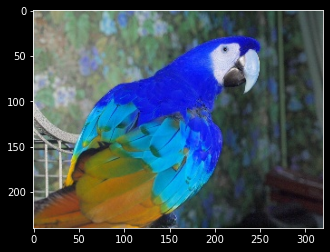

In [20]:
img = cv3.imread('img.jpeg')
plt.imshow(img)

Write to file

In [21]:
cv3.imwrite('img1.jpeg', img)

Image saved in the correct channel order:

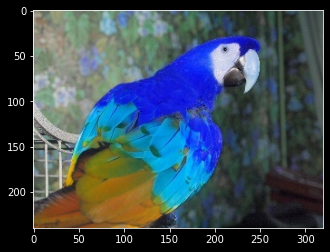

In [22]:
img = cv3.imread('img1.jpeg')
plt.imshow(img)

Writing to non-existent folder

In [23]:
cv3.imwrite('somefolder/img2.jpeg', img)

Imwrite also works with pathlib.Path

In [24]:
save_path = Path('img3.jpeg')
cv3.imwrite(save_path, img)

Showing image in window

## Color spaces

<div class="alert alert-block alert-success">
Forget <code>cv2.cvtColor(img, cv2.COLOR_BGR2RGB)</code>
</div>

Set the default value of i/o color space option (RGB)

In [25]:
cv3.opt.set_rgb()

Swap red and blue channels

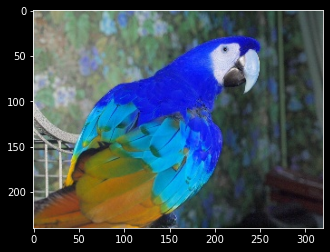

In [30]:
rgb = cv3.imread('img.jpeg')
bgr = cv3.bgr(rgb) # or cv3.rgb
plt.imshow(bgr)

rgb to gray image

Image shape (240, 320)


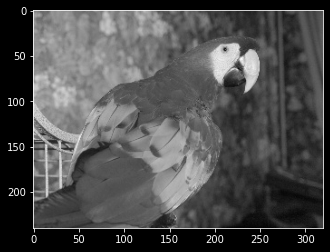

In [31]:
gray = cv3.rgb2gray(rgb)
print('Image shape', gray.shape)
plt.imshow(gray, cmap='gray')

In [32]:
print('Shape before BGR2RGB', gray.shape)
      
gray_rgb = cv3.rgb(gray)
      
print('Shape after BGR2RGB', gray_rgb.shape)

Shape before BGR2RGB (240, 320)
Shape after BGR2RGB (240, 320)


As you can see cv3.rgb (cv3.bgr) doesn't convert gray images

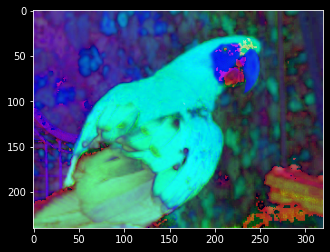

In [33]:
hsv = cv3.rgb2hsv(rgb)
plt.imshow(hsv)

## Transformations

<div class="alert alert-block alert-success">
Forget to copy the same functions from stackoverflow again and again (like rotate, scale, translate)
</div>

Original image

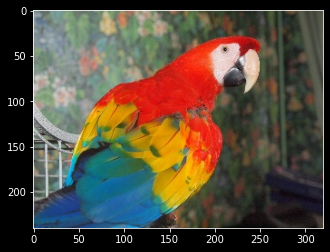

In [37]:
cv3.opt.set_rgb()
img = cv3.imread('img.jpeg')
plt.imshow(img)

Vertical flip

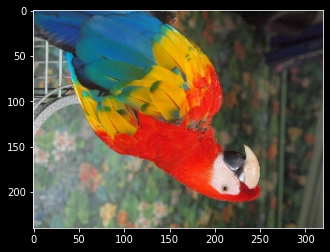

In [38]:
vflip = cv3.vflip(img)
plt.imshow(vflip)

Horizontal flip

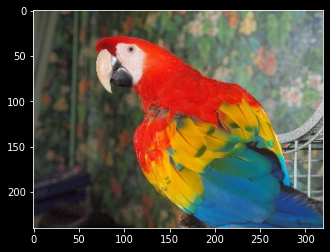

In [39]:
hflip = cv3.hflip(img)
plt.imshow(hflip)

Diagonal flip

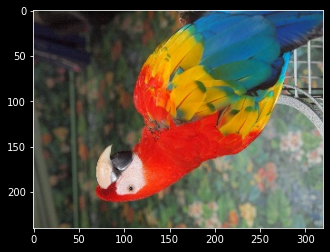

In [40]:
dflip = cv3.dflip(img)
plt.imshow(dflip)

Rotate

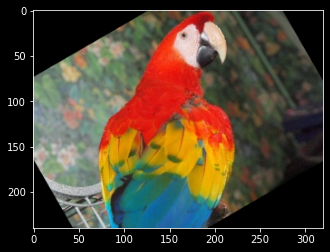

In [41]:
rotated = cv3.rotate(img, 30)
plt.imshow(rotated)

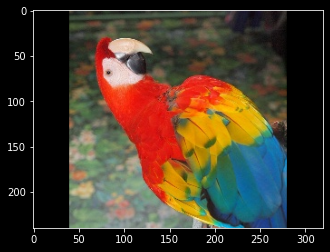

In [42]:
rotated = cv3.rotate90(img) # also cv3.rotate180, cv3.rotate270
plt.imshow(rotated)

Scale

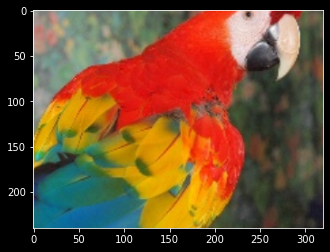

In [43]:
zoomin = cv3.scale(img, 1.5)
plt.imshow(zoomin)

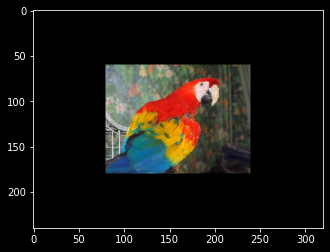

In [44]:
zoomout = cv3.scale(img, 0.5)
plt.imshow(zoomout)

Rotate+scale

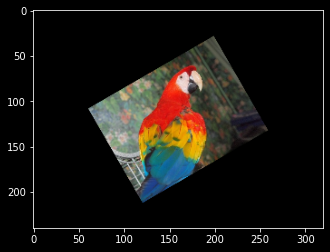

In [45]:
transformed = cv3.transform(img, 30, 0.5)
plt.imshow(transformed)

Translate (shift)

Translate along x-axis

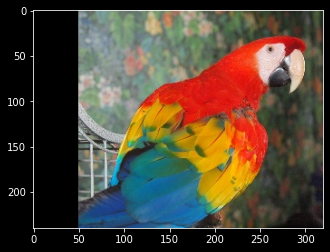

In [46]:
translated = cv3.xshift(img, 50) # or cv3.xtranslate
plt.imshow(translated)

Translate along y-axis

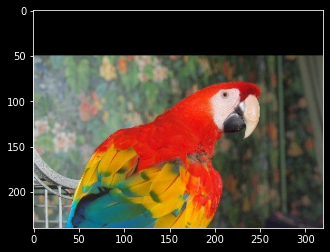

In [47]:
translated = cv3.yshift(img, 50) # or cv3.ytranslate
plt.imshow(translated)

Translate along both axes

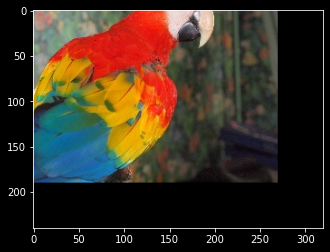

In [48]:
translated = cv3.shift(img, x=-50, y=-50) # or cv3.translate
plt.imshow(translated)

Resizing

It resizes even if you pass float arguments

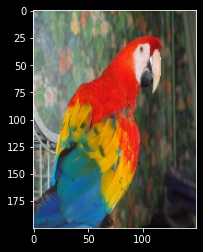

In [49]:
resized = cv3.resize(img, 150, 200.5)
plt.imshow(resized)

Resizing by relative values

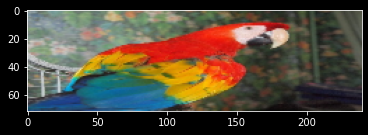

In [53]:
resized = cv3.resize(img, 0.75, 0.3)
plt.imshow(resized)

## Drawing

<div class="alert alert-block alert-success">
Forget to pass <i>color</i> and <i>thickness</i> when you need to draw a rectangle
</div>
<div class="alert alert-block alert-success">
Forget cast all the parameters to integer
</div>    
<div class="alert alert-block alert-success">
Forget <code>TypeError: Expected cv::UMat for argument</code>
</div>

To draw some shapes you don't have to pass `color` and `t` parameters

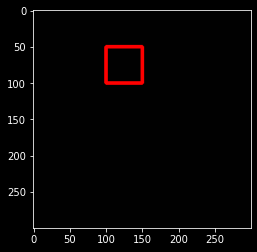

In [58]:
blank = np.ones((300, 300, 3), 'uint8')
cv3.rectangle(blank, 100, 50, 150, 100)
plt.imshow(blank)

...but you can (as keywords)

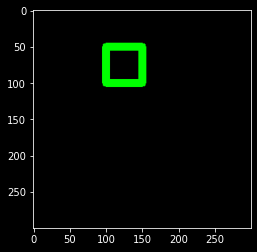

In [59]:
blank = np.zeros((300, 300, 3), 'uint8')
cv3.rectangle(blank, 100, 50, 150, 100, color=(0,255,0), t=10) # as keywords!
plt.imshow(blank)

Also you can pass float arguments

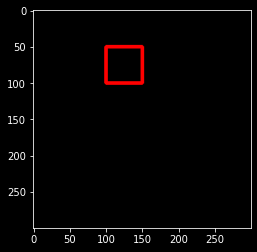

In [60]:
blank = np.zeros((300, 300, 3), 'uint8')
cv3.rectangle(blank, 100.5, 50.2, 150.43, 100.1)
plt.imshow(blank)

And relative coordinates

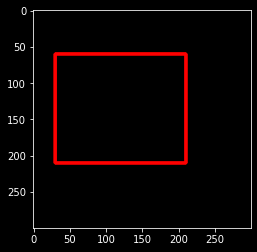

In [61]:
blank = np.zeros((300, 300, 3), 'uint8')
cv3.rectangle(blank, 0.1, 0.2, 0.7, 0.7)
plt.imshow(blank)

To avoid inplace drawing just pass `copy=True` so it returns copy of an image with the figure

Original image


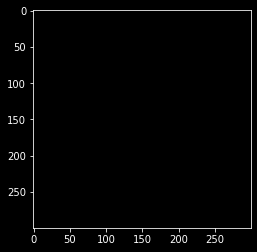

Image with square


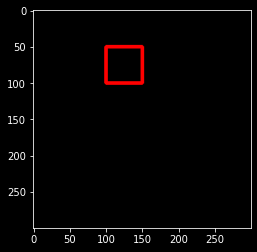

In [77]:
blank = np.zeros((300, 300, 3), 'uint8')
square = cv3.rectangle(blank, 100, 50, 150, 100, copy=True)

print('Original image')
plt.imshow(blank)
plt.show()

print('Image with square')
plt.imshow(square)
plt.show()

To change default color or thickness, use `cv3.options`

In [79]:
cv3.opt.COLOR = [255, 0, 0]
cv3.opt.THICKNESS = 10

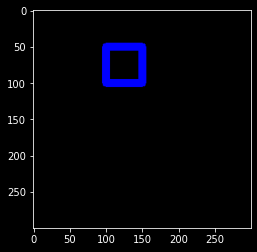

In [80]:
blank = np.zeros((300, 300, 3), 'uint8')
cv3.rectangle(blank, 100, 50, 150, 100)
plt.imshow(blank)

In [82]:
cv3.opt.COLOR = [0, 0, 255]
cv3.opt.THICKNESS = 3

For rectangle you also have different modes: `xyxy` (default), `xywh`, `ccwh`

passing arguments in (xmin, ymin, width, height) mode

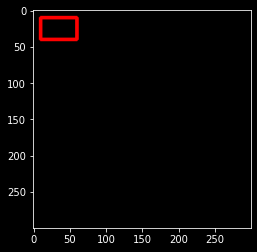

In [83]:
blank = np.zeros((300, 300, 3), 'uint8')
cv3.rectangle(blank, 10, 10, 50, 30, mode='xywh')
plt.imshow(blank)

passing arguments in (center_x, center_y, width, height) mode

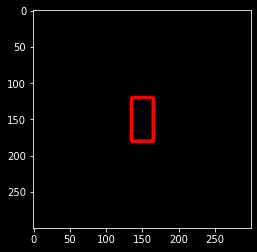

In [84]:
blank = np.zeros((300, 300, 3), 'uint8')
cv3.rectangle(blank, 150, 150, 30, 60, 'ccwh')
plt.imshow(blank)

Other possible figures...

Circle

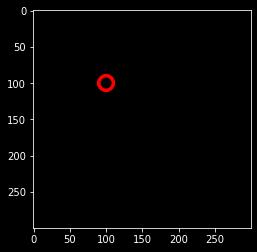

In [85]:
blank = np.zeros((300, 300, 3), 'uint8')
cv3.circle(blank, 100, 100, 10)
plt.imshow(blank)

Point (or filled circle)

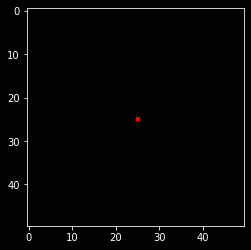

In [86]:
blank = np.zeros((50, 50, 3), 'uint8')
cv3.point(blank, 25, 25)
plt.imshow(blank)

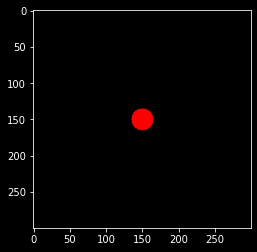

In [87]:
blank = np.zeros((300, 300, 3), 'uint8')
cv3.point(blank, 150, 150, 15)
plt.imshow(blank)

Line

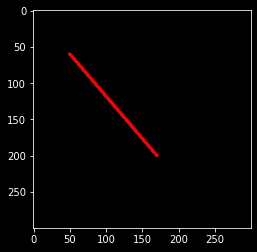

In [88]:
blank = np.zeros((300, 300, 3), 'uint8')
cv3.line(blank, 50, 60, 170, 200)
plt.imshow(blank)

Vertical line

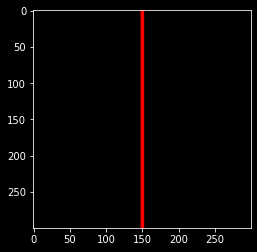

In [89]:
blank = np.zeros((300, 300, 3), 'uint8')
cv3.vline(blank, 150)
plt.imshow(blank)

Horizontal line

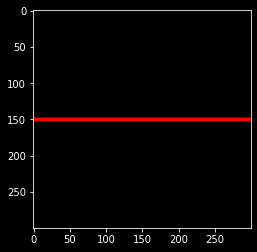

In [90]:
blank = np.zeros((300, 300, 3), 'uint8')
cv3.hline(blank, 150)
plt.imshow(blank)

Text

<div class="alert alert-block alert-success">
Forget to remember all the 10 parameters (6 is required) of cv2.putText and their order
</div>

You don't need to pass pos of text. By default it's (0, HEIGHT/2)

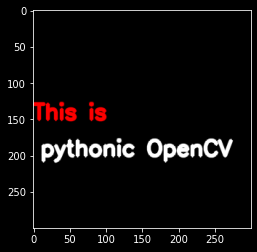

In [91]:
blank = np.zeros((300, 300, 3), 'uint8')
cv3.text(blank, 'This is') # or cv3.putText
cv3.text(blank, 'pythonic OpenCV', 10., 200., color=(255,255,255))
plt.imshow(blank)

Flipped text

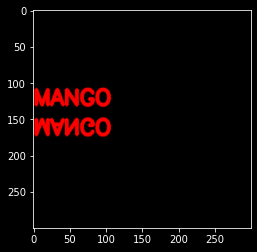

In [92]:
blank = np.zeros((300, 300, 3), 'uint8')
cv3.text(blank, 'MANGO', y=130)
cv3.text(blank, 'MANGO', flip=True)
plt.imshow(blank)

## Processing

Threshold

In [93]:
try:
    cv3.threshold(img)
except AssertionError as exc:
    print(exc)

`img` should be gray image


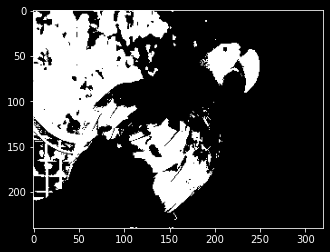

In [94]:
thresh = cv3.threshold(gray) # by default thresh value is 127 and maxval is 255
plt.imshow(thresh, cmap='gray')

## Video

Methods for reading/writing videos have the same features as when working with images (i.e. pathlib.Path, FileNotFound, 'File was not read', options.RGB, etc)

### Reading video

<div class="alert alert-block alert-success">
Forget </br>
    <code>while cap.isOpened(): 
    ret, frame = cap.read()
    if not ret: 
        break</code>
</div> 
<div class="alert alert-block alert-success">
Forget <code>cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT)</code> to get frame count from video </br>
</div>

In [4]:
cap = cv3.Video('vid.mp4') # or cv3.VideoCapture / cv3.VideoReader

Read frame

In [5]:
frame = cap.read()

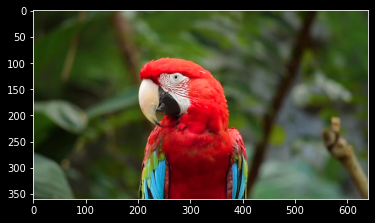

In [6]:
plt.imshow(frame)

Frame count

In [6]:
len(cap)

461

In [7]:
cap.frame_cnt

461

Current frame (from 0 (inclusive) to frame_cnt (exclusive))

In [10]:
cap.now

2

Frames per second

In [11]:
cap.fps

30

Width of frame

In [12]:
cap.width

640

Height of frame

In [13]:
cap.height

360

Shape of frame in format (width, height) (handy for OpenCV functions)

In [14]:
cap.shape

(640, 360)

Iterate over video (!)

In [16]:
for frame in cap:
    if cap.now % 100 == 0:
        print(cap.now, 'frame')

100 frame
200 frame
300 frame
400 frame


In [17]:
try:
    cap.read()
except StopIteration as exc:
    print(exc)

Video has finished


Rewind to nth frame

In [18]:
cap[150] # or cap.rewind(150)

<VideoCapture 0000016713051F40>

In [19]:
cap.now # current frame

150

In [20]:
frame = cap.read()

In [22]:
cap.now

151

Get series of frames

In [23]:
frames = [cv3.resize(frame, 10, 10) for frame in cap]

Closing capture

In [24]:
cap.close() # or cap.release()

Context manager

In [25]:
with cv3.Video('vid.mp4') as cap:
    frame = cap.read()
    
print('cap.isOpened():', cap.isOpened())

cap.isOpened(): False


In [26]:
try:
    cap.read()
except AssertionError as exc:
    print(exc)

Video is closed


### Writing video

<div class="alert alert-block alert-success">
Forget</br>
<code>height, width = frame.shape[:2]
out = cv2.VideoWriter(
    path, 
    cv2.VideoWriter_fourcc('M','P','4','V'), 
    fps, 
    (width, height)
)
out.write(frame)</code>
</div>

In [6]:
out = cv3.Video('output.mp4', 'w') # or cv3.VideoWriter

\_\_init\_\_ of cv2.VideoWriter calls only when the first frame appears

In [7]:
out.shape

(None, None)

In [8]:
out.write(frame)

In [10]:
out.shape

(640, 360)

Let's try to write frame with another shape

In [11]:
try:
    out.write(frame[:100])
except AssertionError as exc:
    print(exc)

Shape mismatch. Required: (640, 360)


In [12]:
out.close() # or out.release()

Context manager

In [13]:
with cv3.Video('output.mp4', 'w') as out:
    out.write(frame)
    out.write(frame)

To change default values of `fourcc` and `fps` use

In [14]:
cv3.opt.FPS = 30
cv3.opt.FOURCC = 'MP4V'